# **Описание датасета**

**Датасет.**
Для анализа был выбран [Student Course Completion Prediction Dataset](https://www.kaggle.com/datasets/nisargpatel344/student-course-completion-prediction-dataset?resource=download).

**Предметная область.**

Датасет содержит информацию о студентах, зачисленных на различные онлайн курсы. Включены данные как о курсах: их сложности, направленности, требуемом времени, так и о самих студентах: их уровне образования, условиях жизни и том, как они проявляют себя на курсе.

**Источник и характер данных.**

Данные были полностью сгенерированы с помощью питона с использованием генератора случайных значений и некоторых логических правил. Хотя данные и не описывают настоящих людей, они симулируют реалистичное поведение студентов, основываясь на определённых поведенческих паттернах, взятых за основу автором скрипта.

**Задача анализа.**

Задача анализа - предсказать, кто из студентов завершит курс, а кто нет. Прваильность предположения можно оценить, сравнив его с готовым ответом, содержащемся в самих данных.

**Атрибуты.**

Student_ID - уникальный идентификатор студента, строка

Name - имя студента, строка

Gender - пол студента, строка

Age - возраст студента, число

Education_Level - учёная степень, строка

Employment_Status - есть ли место работы, строка

City - город проживания, строка

Device_Type - электронное устройство для прохождения курса, строка

Internet_Connection_Quality - Качество связи, строка

Course_ID - идентификатор курса, строка

Course_Name - название курса, строка

Category - тематика курса, строка

Course_Level - уровень сложности курса, строка

Course_Duration_Days - длительность курса в днях, число

Instructor_Rating средняя оценка инструктора, число

Login_Frequency - частота входа студента в систему, число

Average_Session_Duration_Min - среднее время нахождения в системе в минутах, число

Video_Completion_Rate - доля просмотренных видеозантий курса, число

Discussion_Participation - количество участий студента в дискуссиях на форуме, число

Time_Spent_Hours - время, проведённое за изучением курса в часах, число

Days_Since_Last_Login - количество дней с последнего входа в систему, число

Notifications_Checked - количество раз, когда студент прверял уведомления системы, число

Peer_Interaction_Score - оценка качества и количества взаимодействия с сокурсниками, число

Assignments_Submitted - количество успешно сданных заданий, число

Assignments_Missed - количество заданий, не сданных в срок, число

Quiz_Attempts - количество попыток прохождения всех тестов курса, число

Quiz_Score_Avg - средний балл прохождения тестов курса, число

Project_Grade - баллы за выполнение проекта, число

Progress_Percentage - процент прогресса в прохождении курса, число

Rewatch_Count - колчисество повторных просмотров информации курса. число

Enrollment_Date - дата зачисления на курс, строка

Payment_Mode - метод оплаты курса, строка

Fee_Paid - был ли оплачен курс, строка

Discount_Used - была ли использована скидка, строка

Payment_Amount - цена курса, число

App_Usage_Percentage - процент использования приложения курсана электронном устройстве, число

Reminder_Emails_Clicked - количество сообщений с напоминаниями от курса, которые студент открыл, число

Support_Tickets_Raised - количество просьб о студента о помощи, число

Satisfaction_Rating - общий уровень удовлетворения студента, число

Completed - завершён ли курс, строка

# **Выбор атрибута класса**
Датасет подходит для задачи классификации, так как в нём можно выбрать атрибут, который можно рассматривать как целевой. Это атрибут **Completed** (завершён ли курс).

Почему атрибут подходит:
*   Прогноз завершения курса является центральной задачей для анализа эффективности обучения и изначальной задачей анализа выбранного датасета (указано в его описании в источнике).
*   Значения признака логично зависят от множества поведенческих и академических показателей, которые представлены в данных, что обеспечивает содержательную основу для обучения моделей.

# **Этам подготовки данных**
Что именно было сделано:
*   Удалены столбцы, которые не имеют практической ценности для классификации (например, id студентов)
*   Некоторые строковые данные преобразованы в числовые (например, уровень образования) или бинарные (например, оплачен ли курс)
*   К признакам, которые являются номинальными категориальными переменными, применена one-hot кодировка
*   Отделены данные по целевому признаку от данных по определяющим его параметрам
*   Составлена обучающая выборка и тестовая (70/30)
*   Данные масштабированы



In [8]:
import pandas as pd
import numpy as np
from sklearn. preprocessing import StandardScaler
from sklearn. model_selection import train_test_split

df = pd. read_csv ("Course_Completion_Prediction.csv")

uselessColumns = ["Student_ID", "Name", "Enrollment_Date",
                "Course_ID", "Course_Name"]
df = df. drop (columns = uselessColumns)

educationMap = {"HighSchool" : 0, "Diploma" : 1, "Bachelor" : 2, "Master" : 3, "PhD" : 4}
df ["Education_Level"] = df ["Education_Level"]. map (educationMap)

internetMap = {"Low" : 0, "Medium" : 1, "High" : 2}
df ["Internet_Connection_Quality"] = df ["Internet_Connection_Quality"]. map (internetMap)

courseLevelMap = {"Beginner" : 0, "Intermediate" : 1, "Advanced" : 2}
df ["Course_Level"] = df ["Course_Level"]. map (courseLevelMap)

binaryColumns = ["Fee_Paid", "Discount_Used", "Completed"]
binaryMap = {"No" : 0, "Yes" : 1, "Not Completed" : 0, "Completed" : 1}
for column in binaryColumns :
    df [column] = df [column]. map (binaryMap)

nominalColumns = ["Gender", "Employment_Status", "City",
                  "Device_Type", "Category", "Payment_Mode"]

df = pd. get_dummies (df, columns = nominalColumns)

target = df ["Completed"]
features = df. drop ("Completed", axis = 1)

featuresTrain, featuresTest, targetTrain, targetTest = train_test_split (
    features, target, test_size = 0.3, random_state = 58, stratify = target)

scaler = StandardScaler ()
numColumns = features. select_dtypes (include = [np. number]). columns
features [numColumns] = scaler. fit_transform (features [numColumns])

# **Применение алгоритмов классификации**
Код ниже применяет следующие алгоритмы классификации к описанным ранее данным:
*   kNN
*   дерево решений

In [9]:
from sklearn. model_selection import train_test_split
from sklearn. neighbors import KNeighborsClassifier
from sklearn. tree import DecisionTreeClassifier

knn = KNeighborsClassifier (n_neighbors = 5)
knn. fit (featuresTrain, targetTrain)

predictedKnn = knn. predict (featuresTrain)
testedKnn = knn. predict_proba (featuresTest)
predictedKnnTest = knn. predict (featuresTest)

dt = DecisionTreeClassifier (max_depth = 16, random_state = 58)
dt. fit (featuresTrain, targetTrain)

predictedDecisionTree = dt. predict (featuresTrain)
testedDecisionTree = dt. predict_proba (featuresTest)
predictedDecisionTreeTest = dt. predict (featuresTest)

# **Расчёт метрик**
Для оценки эффективности в коде далее были использованы метрики:
*   Accuracy
*   Presicion
*   Recall
*   F-measure
*   ROC (графики)

KNN metrics:
Accuracy: 0.5461
Precision: 0.5374280230326296
Recall: 0.5330070025154667
F-measure: 0.5352083831108987

Decision Tree metrics:
Accuracy: 0.5505666666666666
Precision: 0.5427893340779003
Recall: 0.5286559249439119
F-measure: 0.5356294127776821


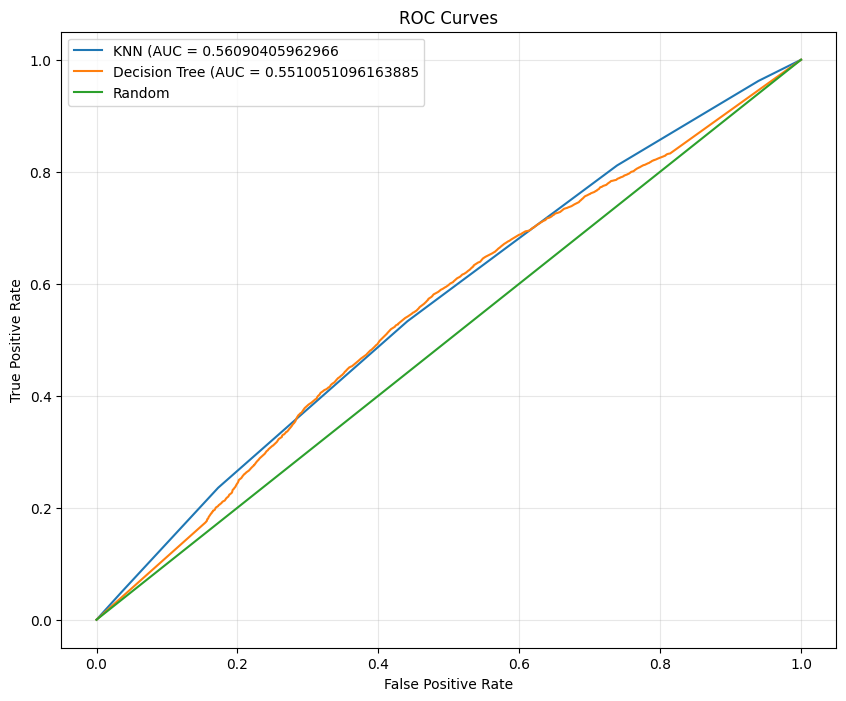

In [14]:
from sklearn. metrics import accuracy_score
from sklearn. metrics import precision_score
from sklearn. metrics import recall_score
from sklearn. metrics import f1_score
from sklearn. metrics import roc_curve
from sklearn. metrics import roc_auc_score
import matplotlib. pyplot as plt

print ("KNN metrics:")
print ("Accuracy:", accuracy_score (targetTest, predictedKnnTest))
print ("Precision:", precision_score (targetTest, predictedKnnTest))
print ("Recall:", recall_score (targetTest, predictedKnnTest))
print ("F-measure:", f1_score (targetTest, predictedKnnTest))

print ("\nDecision Tree metrics:")
print ("Accuracy:", accuracy_score (targetTest, predictedDecisionTreeTest))
print ("Precision:", precision_score (targetTest, predictedDecisionTreeTest))
print ("Recall:", recall_score (targetTest, predictedDecisionTreeTest))
print ("F-measure:", f1_score (targetTest, predictedDecisionTreeTest))

fprKnn, tprKnn, _ = roc_curve (targetTest, testedKnn [ :, 1])
fprDt, tprDt, _ = roc_curve (targetTest, testedDecisionTree [ :, 1])

plt. figure (figsize = (10, 8))
plt. plot (fprKnn, tprKnn, label = "KNN (AUC = " + str (roc_auc_score (targetTest, testedKnn [ :, 1])))
plt. plot (fprDt, tprDt, label = "Decision Tree (AUC = " + str (roc_auc_score (targetTest, testedDecisionTree [ :, 1])))
plt. plot ([0, 1], [0, 1], label = "Random")
plt. xlabel ("False Positive Rate")
plt. ylabel ("True Positive Rate")
plt. title ("ROC Curves")
plt. legend ()
plt. grid (True, alpha = 0.3)
plt. show ()

# **Результаты классификации**
Общие выводы по моделям:
*   Модели правильно предсказывают только 55% случаев, что не многим лучше случайного угадывания
*   Из всех студентов, для которых было предсказано завершение курса, только 54% действительно завершили его
*   Модели находят только 53% реально завершивших курс
*   Модели показали не очень хороший результат для задачи бинарной классификации

Сравнение моделей:
*   Модели сработали практически одинаково, матрики показывают минимальные отличия в качестве
*   Для Decision Tree чуть выше Accuracy и Precision (+ 0.45% и + 0.54%)
*   Decision Tree лучше предсказывает положительные классы
*   kNN лучше показала себя на экстремальные порогах, а Decision Tree на средних значениях

Почему так получилось:
*   Возможно, признаки из данных действительно слабо коррелируют с завершением курса
*   Возможно, эти модели сами по себе довольно слабые для работы с конкретно этими данными и стоило бы попробовать использвоать другие



# **Вывод**
В ходе выполнения работы была выполнена классификация датасета с данными о студентах. Для предсказания завершения курсов были применены модели kNN и дерево решений. Результаты показали, что обе модели демонстрируют достаточно низкую эффективность на выбранных данных и лишь незначительно превышает точность случайного угадывания. Анализ метрик и ROC-кривых указывает на недостаточную предсказательную силу имеющихся в данных признаков.